In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
pd.options.display.max_colwidth = 250
data = pd.read_csv('cleaned_AllPeople.csv')
sessions = pd.read_csv('Cleaned_Dataset_With_ID.csv')
metrics_labels = pd.read_csv('labeled_with_metrics.csv')

/Users/pranavkrishnan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/pranavkrishnan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
metrics = metrics_labels.drop('Unnamed: 0', axis=1)[['distinct_id','Average_SQS', 'time_in_between_sessions_slope', 'avg_session_duration']]
metrics

,distinct_id,Average_SQS,time_in_between_sessions_slope,avg_session_duration
0,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,40.181818,1.113364e+03,82.854545
1,001210DC-54C8-43AD-B295-148F47818391,20.000000,-1.171600e+04,47.940000
2,0025A8A4-2590-4ECA-8CE8-419D710AE46F,27.375000,6.155496e+05,177.325000
3,0038898ed9b23f7e,-1.000000,0.000000e+00,-1.000000
4,003BC352-1FE5-462C-883F-932AC209EB93,-1.000000,0.000000e+00,-1.000000
...,...,...,...,...
7208,wandaandreu@gmail.com_5053,1.666667,1.371636e+07,54.700000
7209,willwojt@gmail.com_6868,4.171717,-1.221786e+02,61.190909
7210,wolphramite@gmail.com_291,1.000000,0.000000e+00,17.500000
7211,xbarbarazhong@gmail.com_6704,42.000000,0.000000e+00,124.150000


In [6]:
metrics_labels

,Unnamed: 0,distinct_id,active_timespan,sessions_per_day,churned,number_ratings,Average_SQS,time_in_between_sessions_slope,avg_session_duration
0,0,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1.130949,85.768672,0,1.0,40.181818,1.113364e+03,82.854545
1,1,001210DC-54C8-43AD-B295-148F47818391,7.158310,8.521564,0,0.0,20.000000,-1.171600e+04,47.940000
2,2,0025A8A4-2590-4ECA-8CE8-419D710AE46F,113.687361,0.562947,0,1.0,27.375000,6.155496e+05,177.325000
3,3,0038898ed9b23f7e,0.000000,0.000000,0,0.0,-1.000000,0.000000e+00,-1.000000
4,4,003BC352-1FE5-462C-883F-932AC209EB93,211.945590,0.042464,0,0.0,-1.000000,0.000000e+00,-1.000000
...,...,...,...,...,...,...,...,...,...
7208,7208,wandaandreu@gmail.com_5053,188.791597,0.026484,0,0.0,1.666667,1.371636e+07,54.700000
7209,7209,willwojt@gmail.com_6868,37.992164,4.685177,0,7.0,4.171717,-1.221786e+02,61.190909
7210,7210,wolphramite@gmail.com_291,79.125498,0.050553,1,0.0,1.000000,0.000000e+00,17.500000
7211,7211,xbarbarazhong@gmail.com_6704,0.584016,35.957906,0,0.0,42.000000,0.000000e+00,124.150000


In [7]:
num_sessions = sessions[['distinct_id', 'session_id']].groupby('distinct_id').agg('count').rename({'session_id' : 'num_sessions'}, axis=1)

In [8]:
num_sessions

,num_sessions
distinct_id,
00000000-0000-0000-0000-000000000000,2
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,97
001210DC-54C8-43AD-B295-148F47818391,61
0019C3B9-FA62-4AB4-A895-1390A1FA818C,1
0025A8A4-2590-4ECA-8CE8-419D710AE46F,64
...,...
wandaandreu@gmail.com_5053,5
willwojt@gmail.com_6868,178
wolphramite@gmail.com_291,4


In [9]:
data = data.merge(num_sessions, how='left', left_on='distinct_id', right_index=True)

In [10]:
def replace_first(row):
    try:
        if (pd.isnull(row["ae_first_app_open_date"])):
            return row["time"]
        else:
            return row["ae_first_app_open_date"]
    except:
        return 0
    
def replace_last_seen(row):
    try:
        if (row["last_time"] > row["last_seen"]):
            return row["last_time"]
        else:
            return row["last_seen"]
    except:
        return 0
    
def last_time_add(row):
    di = row["distinct_id"]
    return keep_last[keep_last["distinct_id"] == di ].iloc[0]["time"]

In [11]:
pd.set_option('display.max_columns', None)

sorted_data = data.copy()
sorted_data["last_seen"] = pd.to_datetime(sorted_data['last_seen'], utc = True)
sorted_data["time"] = pd.to_datetime(sorted_data['time'], utc = True)
sorted_data["ae_first_app_open_date"] = pd.to_datetime(sorted_data["ae_first_app_open_date"], utc = True)
sorted_data = sorted_data.sort_values("time", ascending = True)
keep_last = sorted_data.copy()
sorted_data = sorted_data.drop_duplicates(subset = "distinct_id", keep = "first")
keep_last = keep_last.drop_duplicates(subset = "distinct_id", keep = "last")

sorted_data["last_time"] = sorted_data.apply(last_time_add, axis = 1)
sorted_data["last_seen"] = sorted_data.apply(replace_last_seen, axis = 1)
sorted_data["ae_first_app_open_date"] = sorted_data.apply(replace_first, axis = 1)

date_data = sorted_data.copy()
average_total_app_sessions = np.mean(date_data["ae_total_app_sessions"])
date_data['ae_total_app_sessions'] = date_data['ae_total_app_sessions'] #.fillna(average_total_app_sessions)
date_data['active_timespan'] = date_data["last_seen"] - date_data["ae_first_app_open_date"]
date_data['active_timespan'] = [elem.total_seconds() for elem in date_data['active_timespan']]
date_data['active_timespan'] = date_data['active_timespan'] / (60 * 60 * 24)
date_data['sessions_per_day'] = date_data['num_sessions'] / 180
date_data["sessions_per_day"].replace({np.inf: 0}, inplace=True)
date_data = date_data.sort_values("distinct_id", ascending = True)

In [12]:
filled_data = date_data.copy()
# filled_data = filled_data[["distinct_id", "active_timespan", "ae_total_app_sessions", "sessions_per_day"]]
filled_data

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,num_sessions,last_time,sessions_per_day
83729,165,$ae_first_open,00000000-0000-0000-0000-000000000000,2020-02-13 15:52:50+00:00,NaN,Mumbai,Maharashtra,IN,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2020-02-13 15:52:50+00:00,NaN,NaN,INTL,0,0,0,0,0,2,2020-03-08 20:43:54+00:00,0.011111
84492,4101,AppOpen,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:48:32+00:00,NaN,Palo Alto,California,US,1,0,NaN,Google,NaN,2,0.0,NaN,0.905,Lily Aronovitz,11.0,America/Los_Angeles,2019-08-24 21:57:06+00:00,1.9.6,12.4,"iPhone10,6",3.4.4,2019-08-23 18:48:32+00:00,1.130949,82.272727,US,1,0,0,0,1,97,2019-08-24 09:57:06+00:00,0.538889
55831,138662,AppOpen,001210DC-54C8-43AD-B295-148F47818391,2019-08-04 16:28:25+00:00,NaN,Austin,Texas,US,1,1,NaN,Google,NaN,2,0.0,NaN,0.476,Bruce Chi,10.0,America/Chicago,2019-08-12 01:16:23+00:00,1.9.3,12.4,"iPhone10,4",3.4.4,2019-08-04 21:28:25+00:00,7.158310,47.600000,US,1,0,0,0,1,61,2019-08-11 13:16:23+00:00,0.338889
102081,49911,$ae_first_open,0019C3B9-FA62-4AB4-A895-1390A1FA818C,2019-11-01 14:56:14+00:00,NaN,NaN,NaN,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2019-11-01 14:56:14+00:00,NaN,NaN,US,1,0,0,0,0,1,2019-11-01 14:56:14+00:00,0.005556
33171,160780,AppOpen,0025A8A4-2590-4ECA-8CE8-419D710AE46F,2019-11-21 03:25:46+00:00,NaN,Washington,District of Columbia,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,1.414,LanChi Nguyen,8.0,America/New_York,2020-03-14 01:55:34+00:00,2.5.4,13.3.1,"iPhone9,4",3.4.9,2019-11-21 09:25:46+00:00,113.687361,176.750000,US,1,0,1,0,0,64,2020-03-13 13:55:34+00:00,0.355556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70158,39112,$ae_updated,wandaandreu@gmail.com_5053,2019-08-06 13:00:22+00:00,NaN,Flushing,New York,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Wanda Andreu,NaN,America/New_York,2020-02-11 08:00:16+00:00,NaN,NaN,NaN,NaN,2019-08-06 13:00:22+00:00,188.791597,NaN,US,1,0,0,1,0,5,2020-02-11 08:00:16+00:00,0.027778
87817,16729,AppOpen,willwojt@gmail.com_6868,2020-01-30 11:03:22+00:00,NaN,NaN,NaN,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Will Wojtkiewicz,NaN,America/New_York,2020-03-08 10:52:05+00:00,NaN,NaN,NaN,NaN,2020-01-30 11:03:22+00:00,37.992164,NaN,US,1,0,0,1,0,178,2020-03-08 10:52:05+00:00,0.988889
92278,12150,$ae_updated,wolphramite@gmail.com_291,2019-08-20 01:42:41+00:00,NaN,Washington,District of Columbia,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Walt Ellis,NaN,America/New_York,2019-11-07 04:43:24+00:00,NaN,NaN,NaN,NaN,2019-08-20 01:42:41+00:00,79.125498,NaN,US,1,0,1,0,0,4,2019-11-07 04:43:24+00:00,0.022222
101276,46415,AppOpen,xbarbarazhong@gmail.com_6704,2019-12-12 14:26:47+00:00,NaN,Portland,Oregon,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Barbara Zhong,NaN,America/Los_Angeles,2019-12-13 04:27:46+00:00,NaN,NaN,NaN,NaN,2019-12-12 14:26:47+00:00,0.584016,NaN,US,1,1,0,0,0,21,2019-12-12 14:30:54+00:00,0.116667


In [16]:
data = filled_data.groupby('distinct_id').agg(np.mean).drop('Unnamed: 0', axis=1)

# Churn Label

In [17]:
def labeling(row):
    if (row["active_timespan"] > 0 and row["active_timespan"] < 150 and row["sessions_per_day"] < 0.14):
        return 1
    else:
        return 0

In [18]:
labeled_data = data.copy()
labeled_data["churned"] = filled_data.apply(labeling, axis = 1)

# EDA

ValueError: max must be larger than min in range parameter.

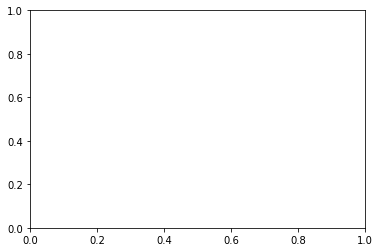

In [19]:
plt.hist(labeled_data['churned'])

In [116]:
labeled_data.drop(83729, axis=0, inplace=True)
labeled_data.drop(102081, axis=0, inplace=True)
labeled_data.drop('ae_total_app_sessions', axis=1, inplace=True)
labeled_data

,distinct_id,active_timespan,sessions_per_day,churned
84492,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1.130949,0.538889,0
55831,001210DC-54C8-43AD-B295-148F47818391,7.158310,0.338889,0
33171,0025A8A4-2590-4ECA-8CE8-419D710AE46F,113.687361,0.355556,0
77423,0038898ed9b23f7e,0.000000,0.005556,0
83631,003BC352-1FE5-462C-883F-932AC209EB93,211.945590,0.050000,0
...,...,...,...,...
70158,wandaandreu@gmail.com_5053,188.791597,0.027778,0
87817,willwojt@gmail.com_6868,37.992164,0.988889,0
92278,wolphramite@gmail.com_291,79.125498,0.022222,1
101276,xbarbarazhong@gmail.com_6704,0.584016,0.116667,1


In [118]:
labeled_data = labeled_data.merge(metrics, how='left', left_on='distinct_id', right_on='distinct_id')

,distinct_id,active_timespan,sessions_per_day,churned,Average_SQS,time_in_between_sessions_slope,avg_session_duration
0,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1.130949,0.538889,0,40.181818,1.113364e+03,82.854545
1,001210DC-54C8-43AD-B295-148F47818391,7.158310,0.338889,0,20.000000,-1.171600e+04,47.940000
2,0025A8A4-2590-4ECA-8CE8-419D710AE46F,113.687361,0.355556,0,27.375000,6.155496e+05,177.325000
3,0038898ed9b23f7e,0.000000,0.005556,0,-1.000000,0.000000e+00,-1.000000
4,003BC352-1FE5-462C-883F-932AC209EB93,211.945590,0.050000,0,-1.000000,0.000000e+00,-1.000000
...,...,...,...,...,...,...,...
7208,wandaandreu@gmail.com_5053,188.791597,0.027778,0,1.666667,1.371636e+07,54.700000
7209,willwojt@gmail.com_6868,37.992164,0.988889,0,4.171717,-1.221786e+02,61.190909
7210,wolphramite@gmail.com_291,79.125498,0.022222,1,1.000000,0.000000e+00,17.500000
7211,xbarbarazhong@gmail.com_6704,0.584016,0.116667,1,42.000000,0.000000e+00,124.150000


In [120]:
dataset

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown
0,0,$ae_session,Gh@g.com_5858,2019-08-19 21:43:18+00:00,179.7,Bengaluru,Karnataka,IN,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Ramya Ram,14.310123,Asia/Kolkata,2019-08-20 09:57:21+00:00,NaN,NaN,NaN,NaN,2019-08-19 21:43:18+00:00,0 days 12:14:03,NaN,INTL,0,0,1,0,0
1,98111,$ae_session,A5C759A6-9FE5-4071-9D0A-4B91C61F63BD,2019-06-12 17:44:46+00:00,16.3,Pasadena,California,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,0.118,Unknown,3.000000,America/Los_Angeles,2020-01-12 21:37:15+00:00,2.4.0,13.3,"iPhone12,5",3.4.4,2019-06-12 17:44:46+00:00,214 days 03:52:29,39.333333,US,1,0,0,0,1
2,98143,Search - Change Section,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,2019-11-21 11:58:17+00:00,NaN,Kyiv,Kyiv City,UA,1,0,NaN,Facebook,NaN,2,0.0,NaN,613.630,Daria Shevchenko,3012.000000,Europe/Kiev,2020-03-19 17:42:21+00:00,2.5.4,13.3.1,"iPhone10,5",3.4.9,2019-11-21 11:58:17+00:00,119 days 05:44:04,203.728420,INTL,0,1,0,0,0
3,98142,Onboarding - Allow Location,C9434897-9F99-4D5F-B9D3-A3E8DAFC0B74,2019-06-15 01:07:41+00:00,NaN,Mill Valley,California,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,0.304,Jonathan Vlassopulos,8.000000,America/Los_Angeles,2020-04-05 06:00:00+00:00,2.5.6,13.3.1,"iPhone12,5",3.4.9,2019-06-15 01:07:41+00:00,295 days 04:52:19,38.000000,US,1,1,0,0,0
4,98141,$ae_session,4E1A70A0-C2DB-46EB-A9C8-B4F0B0815771,2019-11-21 11:58:17+00:00,106.7,Kyiv,Kyiv City,UA,1,1,NaN,Facebook,NaN,2,0.0,NaN,613.630,Daria Shevchenko,3012.000000,Europe/Kiev,2020-03-19 17:42:21+00:00,2.5.4,13.3.1,"iPhone10,5",3.4.9,2019-11-21 11:58:17+00:00,119 days 05:44:04,203.728420,INTL,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190366,143333,Sidebar - Change Password,DB387857-02A8-4BBF-B299-450EDB8C9560,2019-08-19 17:01:09+00:00,NaN,Princeton,New Jersey,US,1,0,NaN,Facebook,NaN,2,0.0,NaN,0.514,Jeremiah Liu,9.000000,America/New_York,2019-08-28 16:37:40+00:00,1.9.6,13.0,"iPhone9,3",3.4.4,2019-08-19 17:01:09+00:00,8 days 23:36:31,57.111111,US,1,0,0,0,1
190367,143334,Visit Change Password Page,DB387857-02A8-4BBF-B299-450EDB8C9560,2019-08-19 17:01:09+00:00,NaN,Princeton,New Jersey,US,1,0,NaN,Facebook,NaN,2,0.0,NaN,0.514,Jeremiah Liu,9.000000,America/New_York,2019-08-28 16:37:40+00:00,1.9.6,13.0,"iPhone9,3",3.4.4,2019-08-19 17:01:09+00:00,8 days 23:36:31,57.111111,US,1,0,0,0,1
190368,143335,Feed - Scroll Down,DB387857-02A8-4BBF-B299-450EDB8C9560,2019-08-19 17:01:09+00:00,NaN,Princeton,New Jersey,US,1,0,NaN,Facebook,NaN,2,0.0,NaN,0.514,Jeremiah Liu,9.000000,America/New_York,2019-08-28 16:37:40+00:00,1.9.6,13.0,"iPhone9,3",3.4.4,2019-08-19 17:01:09+00:00,8 days 23:36:31,57.111111,US,1,0,0,0,1
190369,143339,$ae_session,DB387857-02A8-4BBF-B299-450EDB8C9560,2019-08-19 17:01:09+00:00,174.8,Princeton,New Jersey,US,1,0,NaN,Facebook,NaN,2,0.0,NaN,0.514,Jeremiah Liu,9.000000,America/New_York,2019-08-28 16:37:40+00:00,1.9.6,13.0,"iPhone9,3",3.4.4,2019-08-19 17:01:09+00:00,8 days 23:36:31,57.111111,US,1,0,0,0,1


In [84]:
labeled_data.to_csv('labeled_data.csv')

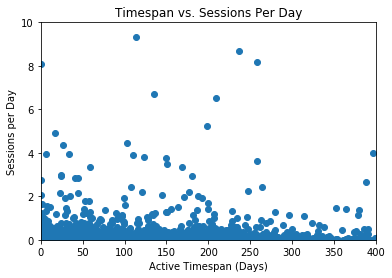

In [85]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Sessions per Day')
plt.ylim((0, 10))
plt.xlim((0, 400))
plt.title('Timespan vs. Sessions Per Day')
plt.scatter(labeled_data['active_timespan'], labeled_data['sessions_per_day'])

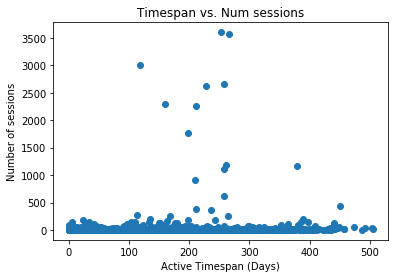

In [151]:
plt.xlabel('Active Timespan (Days)')
plt.ylabel('Number of sessions')
plt.title('Timespan vs. Num sessions')
plt.scatter(labeled_data['active_timespan'], labeled_data['ae_total_app_sessions'])

# Pranav's Other Plots

(array([7.199e+03, 4.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([1.0000e+00, 3.6120e+02, 7.2140e+02, 1.0816e+03, 1.4418e+03,
        1.8020e+03, 2.1622e+03, 2.5224e+03, 2.8826e+03, 3.2428e+03,
        3.6030e+03]),
 <a list of 10 Patch objects>)

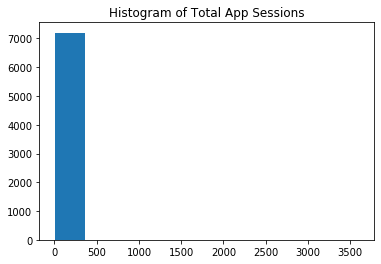

In [152]:
plt.title('Histogram of Total App Sessions')
plt.hist(id_sessions['ae_total_app_sessions'])

(array([33., 20., 22., 12.,  4.,  4.,  3.,  1.,  3.,  5.,  3.,  4.,  0.,
         1.,  3.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.,
        140., 150., 160., 170., 180., 190., 200., 210., 220., 230., 240.,
        250., 260., 270., 280., 290., 300., 310., 320., 330., 340., 350.,
        360., 370., 380., 390., 400., 410., 420., 430., 440., 450., 460.,
        470., 480., 490., 500.]),
 <a list of 47 Patch objects>)

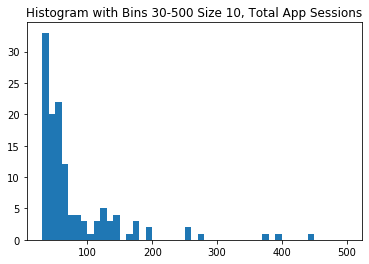

In [153]:
plt.title('Histogram with Bins 30-500 Size 10, Total App Sessions')
plt.hist(id_sessions['ae_total_app_sessions'], bins=np.linspace(30, 500, 48))

# Comparing Both Results Before Replacing Last_Seen (DON'T RUN)

In [17]:
erica = date_data.copy()
pranav = sorted_id.copy()
erica.sort_values("distinct_id", ascending = True)
pranav.sort_values("distinct_id", ascending = True)

,active_timespan,ae_total_app_sessions,sessions_per_day,churned
distinct_id,,,,
00000000-0000-0000-0000-000000000000,NaN,14.310123,NaN,0
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1.130949,11.000000,9.726344,0
001210DC-54C8-43AD-B295-148F47818391,7.158310,10.000000,1.396978,0
0019C3B9-FA62-4AB4-A895-1390A1FA818C,NaN,14.310123,NaN,0
0025A8A4-2590-4ECA-8CE8-419D710AE46F,113.687361,8.000000,0.070368,1
...,...,...,...,...
wandaandreu@gmail.com_5053,-19.645486,14.310123,-0.728418,0
willwojt@gmail.com_6868,36.216782,14.310123,0.395124,0
wolphramite@gmail.com_291,-245.893843,14.310123,-0.058196,0


In [20]:
erica["sessions_per_day"].equals(pranav["sessions_per_day"])

False

In [25]:
import math
math.isnan
one = erica["sessions_per_day"].tolist()
two = pranav["sessions_per_day"].tolist()
for i in range(len(one)):
    o = one[i]
    t = two[i]
    if (one[i] != two[i]):
        if (math.isnan(o) == False):
            if (abs(o - t) > .1):
                print(o, t)

0.07278842354177645 24.531639758206442
28.432669743902608 28.62024638457417
0.4900072581207263 28.620246384574187
0.07970300149199487 24.531639758206435
21.055767094918338 22.46111695334107
11.327481848956525 28.620246384574177
34.49461021715357 35.20221076685976
0.10954724150571979 24.531639758206435
1.6586572703588247 28.62024638457418
0.08807520294213118 4.26179604261796
47.04174228675136 47.39007221866716
0.4223504978400627 84.00194448945578
0.054142424184744097 0.28945184219849396
0.027654150283022944 5.142857142857142
10.45040568548097 11.020674106173274
0.47962805035023925 2.014818812471189


In [26]:
erica[erica["sessions_per_day"] == 0.07278842354177645]

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,active_timespan_days,sessions_per_day
70325,39167,$ae_updated,1a28969580acaa3f,2019-08-06 14:18:28.000000,NaN,Crystal Lake,Illinois,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2019-08-06 14:18:28+00:00,196 days 14:22:24,NaN,US,1,0,1,0,0,196.598889,0.072788


In [27]:
pranav[pranav["sessions_per_day"] == 24.531639758206442]

,active_timespan,ae_total_app_sessions,sessions_per_day,churned
distinct_id,,,,
11bc4edd4573c931,0.583333,14.310123,24.53164,0
1a28969580acaa3f,0.583333,14.310123,24.53164,0
4172008ac9320d3b,0.583333,14.310123,24.53164,0
50e9adab34f13549,0.583333,14.310123,24.53164,0
768bf0dcf15e5f1e,0.583333,14.310123,24.53164,0
7bf3d03785992b80,0.583333,14.310123,24.53164,0
8fe2d4985cbd2c17,0.583333,14.310123,24.53164,0
917a497f78326a7d,0.583333,14.310123,24.53164,0
A3BF314A-A411-4602-9774-0A4F4F3FD0AE,0.583333,14.310123,24.53164,0


In [70]:
original = data.copy()
original[original["distinct_id"] == "1a28969580acaa3f"]

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown
59695,25019,$ae_updated,1a28969580acaa3f,2019-08-30 05:17:28.000000,NaN,Crystal Lake,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
70325,39167,$ae_updated,1a28969580acaa3f,2019-08-06 14:18:28.000000,NaN,Crystal Lake,Illinois,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
70326,39168,$ae_session,1a28969580acaa3f,2019-08-06 14:20:11.000000,102.6,Crystal Lake,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
93485,11009,Profile - Go to Menu,1a28969580acaa3f,2020-02-18 14:41:42.000000,NaN,Detroit,Michigan,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
93498,10985,Visit Menu Page,1a28969580acaa3f,2020-02-18 14:41:44.000000,NaN,Detroit,Michigan,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
93499,10986,AppOpen,1a28969580acaa3f,2020-02-18 14:40:52.000000,NaN,Detroit,Michigan,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0


In [71]:
original[original["distinct_id"] == "1a28969580acaa3f"]

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown
59695,25019,$ae_updated,1a28969580acaa3f,2019-08-30 05:17:28.000000,NaN,Crystal Lake,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
70325,39167,$ae_updated,1a28969580acaa3f,2019-08-06 14:18:28.000000,NaN,Crystal Lake,Illinois,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
70326,39168,$ae_session,1a28969580acaa3f,2019-08-06 14:20:11.000000,102.6,Crystal Lake,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
93485,11009,Profile - Go to Menu,1a28969580acaa3f,2020-02-18 14:41:42.000000,NaN,Detroit,Michigan,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
93498,10985,Visit Menu Page,1a28969580acaa3f,2020-02-18 14:41:44.000000,NaN,Detroit,Michigan,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0
93499,10986,AppOpen,1a28969580acaa3f,2020-02-18 14:40:52.000000,NaN,Detroit,Michigan,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,NaN,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,1,0,1,0,0


In [72]:
pranav_og = dataset.copy()
pranav_og[pranav_og["distinct_id"] == "1a28969580acaa3f"]

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown
59695,25019,$ae_updated,1a28969580acaa3f,2020-02-18 14:40:52+00:00,NaN,Crystal Lake,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2020-02-18 14:40:52+00:00,14:00:00,NaN,US,1,0,1,0,0
70325,39167,$ae_updated,1a28969580acaa3f,2020-02-18 14:40:52+00:00,NaN,Crystal Lake,Illinois,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2020-02-18 14:40:52+00:00,14:00:00,NaN,US,1,0,1,0,0
70326,39168,$ae_session,1a28969580acaa3f,2020-02-18 14:40:52+00:00,102.6,Crystal Lake,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2020-02-18 14:40:52+00:00,14:00:00,NaN,US,1,0,1,0,0
93485,11009,Profile - Go to Menu,1a28969580acaa3f,2020-02-18 14:40:52+00:00,NaN,Detroit,Michigan,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2020-02-18 14:40:52+00:00,14:00:00,NaN,US,1,0,1,0,0
93498,10985,Visit Menu Page,1a28969580acaa3f,2020-02-18 14:40:52+00:00,NaN,Detroit,Michigan,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2020-02-18 14:40:52+00:00,14:00:00,NaN,US,1,0,1,0,0
93499,10986,AppOpen,1a28969580acaa3f,2020-02-18 14:40:52+00:00,NaN,Detroit,Michigan,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2020-02-18 14:40:52+00:00,14:00:00,NaN,US,1,0,1,0,0


In [73]:
erica[erica["distinct_id"] == "1a28969580acaa3f"]

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,active_timespan_days,sessions_per_day
70325,39167,$ae_updated,1a28969580acaa3f,2019-08-06 14:18:28.000000,NaN,Crystal Lake,Illinois,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,Natalie K,14.310123,America/Detroit,2020-02-19 04:40:52+00:00,NaN,NaN,NaN,NaN,2019-08-06 14:18:28+00:00,196 days 14:22:24,NaN,US,1,0,1,0,0,196.598889,0.072788


In [75]:
erica[erica["sessions_per_day"] < 0]

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded,ae_total_app_session_length,name_y,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,active_timespan_days,sessions_per_day
77423,6827,$ae_updated,0038898ed9b23f7e,2019-08-23 05:22:36.000000,NaN,Taguig,Metro Manila,PH,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Unknown,14.310123,Asia/Manila,2019-05-24 04:51:53+00:00,NaN,NaN,NaN,NaN,2019-08-23 05:22:36+00:00,-92 days +23:29:17,NaN,INTL,0,0,0,0,1,-91.021331,-0.157217
92275,12147,$ae_updated,00471d582ed13800,2020-01-17 08:44:21.000000,NaN,Speedwell,Tennessee,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,S F,14.310123,America/Los_Angeles,2019-06-06 19:56:50+00:00,NaN,NaN,NaN,NaN,2020-01-17 08:44:21+00:00,-225 days +11:12:29,NaN,US,1,0,1,0,0,-224.532998,-0.063733
94904,14154,$ae_updated,027e9256473c841d,2019-09-04 09:06:05.000000,NaN,Arlington,Virginia,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,NaN,mona george,14.310123,America/New_York,2019-06-10 16:01:15+00:00,NaN,NaN,NaN,NaN,2019-09-04 09:06:05+00:00,-86 days +06:55:10,NaN,US,1,0,0,1,0,-85.711690,-0.166956
99440,45484,$ae_updated,0785BD4E-3F03-4069-B360-F5300B407605_305,2019-12-13 10:17:06.000000,NaN,Chicago,Illinois,US,1,0,NaN,Foodie,NaN,2,0.0,NaN,0.062,Unknown,2.000000,America/Chicago,2018-12-01 19:16:42+00:00,0.5.4,12.1,"iPhone9,3",3.3.3,2019-12-13 10:17:06+00:00,-377 days +08:59:36,31.0,US,1,1,0,0,0,-376.625278,-0.005310
95724,13296,$campaign_delivery,09719898d6bc68aa,2019-10-31 00:19:43.000000,NaN,NaN,NaN,NaN,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Bekki Filipczak,14.310123,America/New_York,2019-06-11 00:00:21+00:00,NaN,NaN,NaN,NaN,2019-10-31 00:19:43+00:00,-143 days +23:40:38,NaN,NaN,2,1,0,0,0,-142.013449,-0.100766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77773,6338,$ae_updated,siddharthseth96@gmail.com_240,2019-08-23 13:05:13.000000,NaN,NaN,Illinois,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Siddharth Seth,14.310123,America/Chicago,2019-07-08 22:37:16+00:00,NaN,NaN,NaN,NaN,2019-08-23 13:05:13+00:00,-46 days +09:32:03,NaN,US,1,0,1,0,0,-45.602743,-0.313800
96922,42531,$ae_session,suneelpasupuleti@ymail.com_4702,2019-08-18 13:24:05.000000,18.8,Sacramento,California,US,0,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Suneel Pasupuleti,14.310123,America/Los_Angeles,2019-07-01 19:28:02+00:00,NaN,NaN,NaN,NaN,2019-08-18 13:24:05+00:00,-48 days +06:03:57,NaN,US,1,1,0,0,0,-47.747257,-0.299706
67217,23336,$ae_updated,tiffanykim@uchicago_254,2019-08-25 10:02:50.000000,NaN,Great Falls,Virginia,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Tiffany Kim,14.310123,America/Chicago,2019-06-11 00:15:29+00:00,NaN,NaN,NaN,NaN,2019-08-25 10:02:50+00:00,-76 days +14:12:39,NaN,US,1,0,1,0,0,-75.407882,-0.189770
70158,39112,$ae_updated,wandaandreu@gmail.com_5053,2019-08-06 13:00:22.000000,NaN,Flushing,New York,US,1,1,NaN,Foodie,NaN,2,0.0,NaN,NaN,Wanda Andreu,14.310123,America/New_York,2019-07-17 21:30:52+00:00,NaN,NaN,NaN,NaN,2019-08-06 13:00:22+00:00,-20 days +08:30:30,NaN,US,1,0,0,1,0,-19.645486,-0.728418
